In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [421]:
df_walmart = pd.read_csv('Walmart_Store_sales.csv')

In [422]:
df_walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [423]:
df_walmart_main = df_walmart.copy()

In [424]:
df_walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [425]:
df_walmart.shape

(6435, 8)

# Data manipulation

In [426]:
df_walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Treating Skewness of The Data

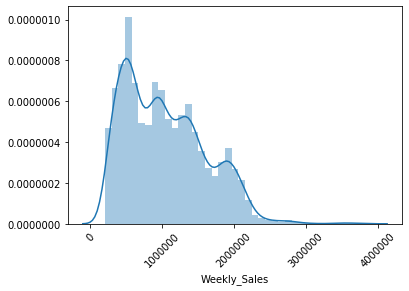

In [427]:
sns.distplot(df_walmart['Weekly_Sales'])
plt.xticks(rotation=45);

In [428]:
print("Skewness: %f" % df_walmart['Weekly_Sales'].skew())
print("Kutosis: %f" % df_walmart['Weekly_Sales'].kurt())

Skewness: 0.668362
Kutosis: 0.053141


In [429]:
Weekly_Sales_log = np.log(df_walmart['Weekly_Sales'])

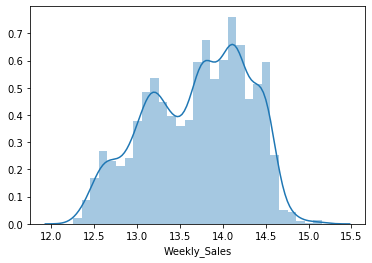

In [430]:
sns.distplot(Weekly_Sales_log)

In [431]:
df_walmart['Weekly_Sales_log'] = Weekly_Sales_log

In [432]:
df_walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,14.179835
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106,14.202483
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106,14.155142
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808,14.282364
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808,14.250805


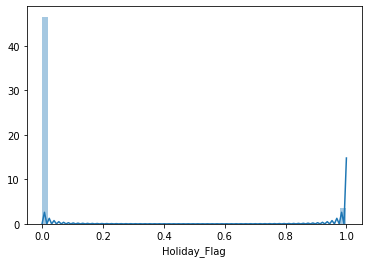

In [433]:
sns.distplot(df_walmart['Holiday_Flag'])

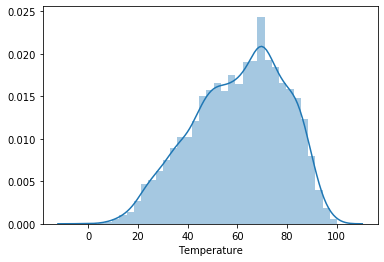

In [434]:
sns.distplot(df_walmart['Temperature'])

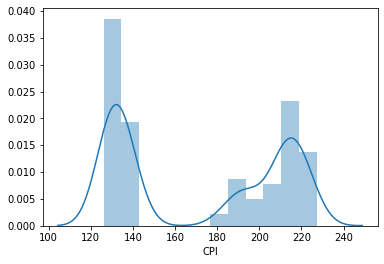

In [435]:
sns.distplot(df_walmart['CPI'])

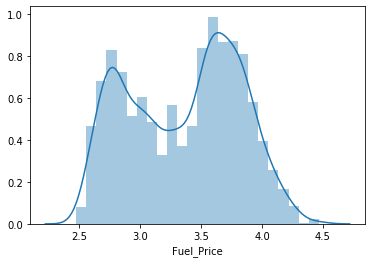

In [436]:
sns.distplot(df_walmart['Fuel_Price'])

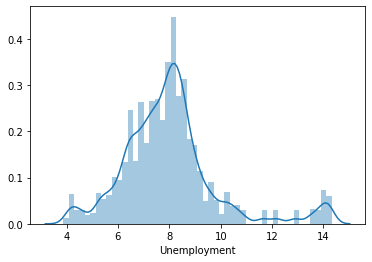

In [437]:
sns.distplot(df_walmart['Unemployment'])

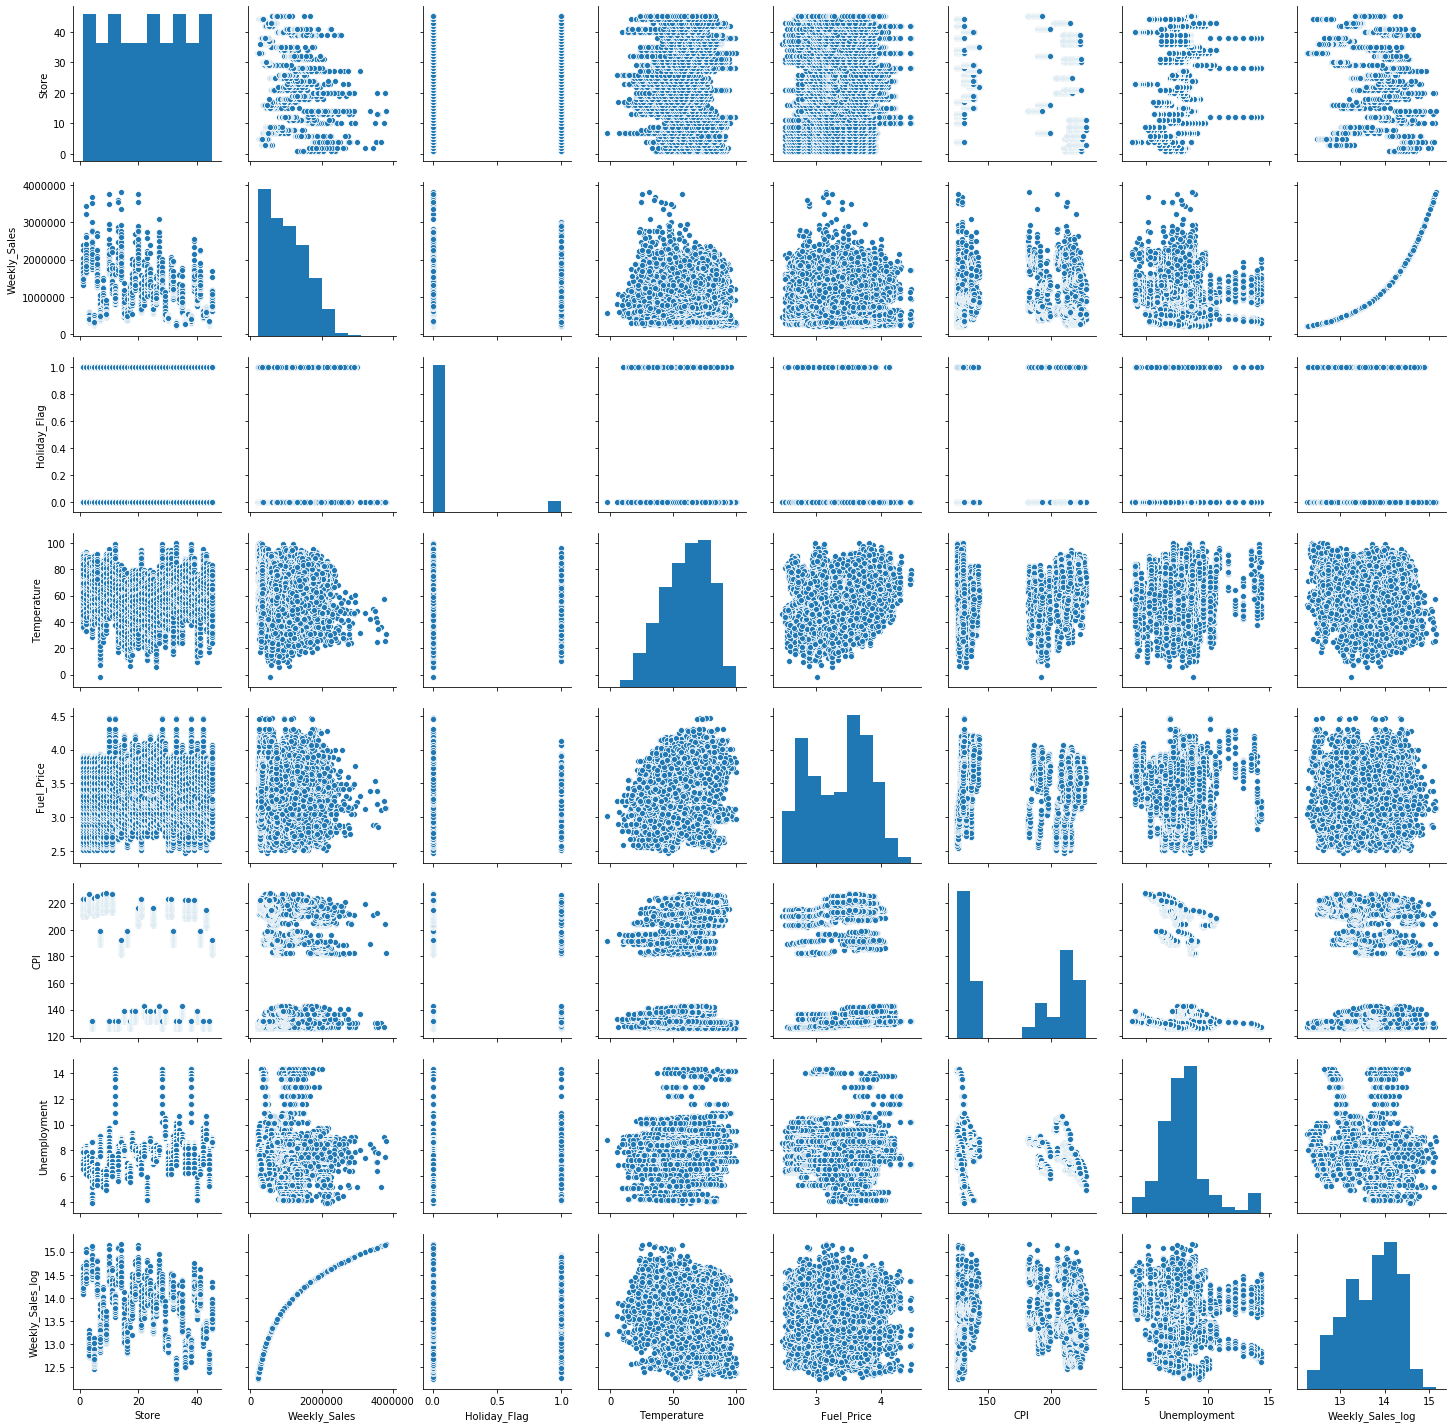

In [438]:
sns.pairplot(df_walmart)

# Correlations among features :

In [439]:
corr = df_walmart.corr()

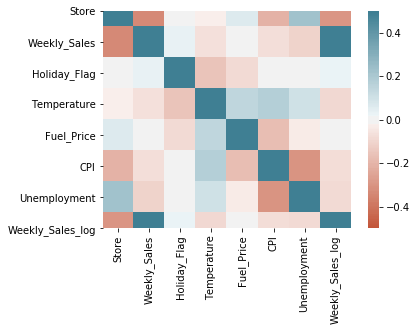

In [440]:
sns.heatmap(corr, vmin=-0.5, vmax=0.5, center=0, cmap = sns.diverging_palette(20,220,n=200) ,square=True)

# Which store has maximum sales

In [441]:
df_walmart.groupby('Store').sum().sort_values('Weekly_Sales', ascending=False)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log
Store,,,,,,,
20,3.013978e+08,10,7929.55,488.718,29892.452680,1054.112,2081.238393
4,2.995440e+08,10,8902.23,460.027,18401.192733,852.951,2080.406081
14,2.889999e+08,10,8264.11,488.718,26638.851959,1236.771,2074.685730
13,2.865177e+08,10,7678.69,469.919,18401.192733,1001.261,2074.010001
2,2.753824e+08,10,9754.94,460.417,30837.422420,1090.210,2068.457222
10,2.716177e+08,10,10330.49,511.357,18401.192733,1195.904,2065.980893
27,2.538559e+08,10,8195.49,511.696,19878.613542,1144.250,2056.542870
6,2.237561e+08,10,9967.10,460.417,31110.107182,944.787,2038.536728
1,2.224028e+08,10,9767.87,460.417,30887.555523,1088.290,2038.133090


Store No. 20 has maximum sales of 3.013978e+08 during the respective period

# Finding maximun standard deviation of sales

In [442]:
df_walmart.groupby('Store').Weekly_Sales.std().max()

317569.9494755081

# Now, Finding coefficient of Mean to Standard deviation

In [443]:
s = df_walmart.groupby('Store').Weekly_Sales.std()

In [444]:
me = df_walmart.groupby('Store').Weekly_Sales.mean()

In [445]:
sme = me/s

In [446]:
sme.sort_values(ascending = False)

Store
37    23.761933
30    19.227797
43    15.599741
44    12.225939
31    11.091264
42    11.069866
33    10.767931
1      9.970873
34     9.239989
26     9.081773
38     9.019129
3      8.694034
8      8.550456
32     8.452336
5      8.426840
11     8.179167
2      8.102160
40     8.101772
24     8.088169
17     7.966815
9      7.880502
4      7.868902
20     7.639263
13     7.546394
19     7.536924
27     7.398888
6      7.362531
28     7.281744
12     7.250300
41     6.748681
39     6.670767
22     6.378248
14     6.363884
10     6.284032
25     6.255458
36     6.150859
18     6.140790
16     6.053978
45     6.038183
21     5.872253
23     5.564175
29     5.442400
15     5.171059
7      5.068303
35     4.353863
Name: Weekly_Sales, dtype: float64

In [447]:
df_walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,14.179835
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106,14.202483
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106,14.155142
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808,14.282364
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808,14.250805


### Good Quaterly growth rate in Q3'2012

In [448]:
df_walmart.index = df_walmart['Date']

In [449]:
df_walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log
Date,,,,,,,,,
05-02-2010,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455
12-02-2010,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400
19-02-2010,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966
26-02-2010,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907
05-03-2010,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862
12-03-2010,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,14.179835
19-03-2010,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106,14.202483
26-03-2010,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106,14.155142
02-04-2010,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808,14.282364


Splitting Date into features

In [450]:
df_walmart['Date'] = pd.to_datetime(df_walmart['Date'])

In [451]:
type(df_walmart['Date'])

pandas.core.series.Series

In [452]:
df_walmart['Month'] = df_walmart['Date'].dt.month

In [453]:
df_walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log,Month
Date,,,,,,,,,,
05-02-2010,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,5
12-02-2010,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,12
19-02-2010,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966,2
26-02-2010,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907,2
05-03-2010,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,5
...,...,...,...,...,...,...,...,...,...,...
28-09-2012,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,13.477481,9
05-10-2012,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,13.505522,5
12-10-2012,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,13.506897,12


In [454]:
df_walmart['Quarter'] = df_walmart['Date'].dt.quarter

In [455]:
df_walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log,Month,Quarter
Date,,,,,,,,,,,
05-02-2010,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,5,2
12-02-2010,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,12,4
19-02-2010,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966,2,1
26-02-2010,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907,2,1
05-03-2010,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,5,2
12-03-2010,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,14.179835,12,4
19-03-2010,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,14.202483,3,1
26-03-2010,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,14.155142,3,1
02-04-2010,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,14.282364,2,1


In [456]:
df_walmart['Year'] = df_walmart['Date'].dt.year

In [457]:
df_walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log,Month,Quarter,Year
Date,,,,,,,,,,,,
05-02-2010,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,5,2,2010
12-02-2010,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,12,4,2010
19-02-2010,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966,2,1,2010
26-02-2010,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907,2,1,2010
05-03-2010,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,5,2,2010
12-03-2010,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,14.179835,12,4,2010
19-03-2010,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,14.202483,3,1,2010
26-03-2010,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,14.155142,3,1,2010
02-04-2010,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,14.282364,2,1,2010


In [458]:
df_walmart.groupby('Store')

In [459]:
d = df_walmart.sort_values('Year', ascending=False)

In [460]:
growth_rate = d[(d.Quarter == 3) & (d.Year == 2012)].groupby('Store').Weekly_Sales.mean().sort_values(ascending = False)

In [461]:
d

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log,Month,Quarter,Year
Date,,,,,,,,,,,,
26-10-2012,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,13.541444,10,4,2012
09-03-2012,13,2012-09-03,1986445.65,0,38.24,3.380,130.741379,6.104,14.501857,9,3,2012
23-03-2012,13,2012-03-23,1904421.74,0,47.83,3.671,130.896645,6.104,14.459689,3,1,2012
30-03-2012,13,2012-03-30,1948982.70,0,53.20,3.734,130.967097,6.104,14.482818,3,1,2012
06-04-2012,13,2012-06-04,2271614.76,0,48.85,3.793,131.037548,5.965,14.636001,6,2,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
03-09-2010,32,2010-03-09,1095932.51,0,70.20,2.773,190.362161,9.017,13.907116,3,1,2010
10-09-2010,32,2010-10-09,1028635.39,1,68.44,2.780,190.395829,9.017,13.843744,10,4,2010
17-09-2010,32,2010-09-17,1043962.36,0,67.17,2.800,190.468829,9.017,13.858534,9,3,2010


## Holidays which have higher sales the mean sales in non-holiday season

#### Holiday Season Sales 

In [462]:
df_walmart.loc[['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013', '10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013', '26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013', '31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']].dropna()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log,Month,Quarter,Year
Date,,,,,,,,,,,,
12-02-2010,1.0,2010-12-02,1641957.44,1.0,38.51,2.548,211.242170,8.106,14.311400,12.0,4.0,2010.0
12-02-2010,2.0,2010-12-02,2137809.50,1.0,38.49,2.548,210.897994,8.324,14.575292,12.0,4.0,2010.0
12-02-2010,3.0,2010-12-02,420728.96,1.0,47.93,2.548,214.574792,7.368,12.949744,12.0,4.0,2010.0
12-02-2010,4.0,2010-12-02,2188307.39,1.0,28.84,2.573,126.496258,8.623,14.598639,12.0,4.0,2010.0
12-02-2010,5.0,2010-12-02,311825.70,1.0,39.81,2.548,211.800470,6.566,12.650200,12.0,4.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30-12-2011,41.0,2011-12-30,1264014.16,1.0,34.12,3.119,196.358610,6.759,14.049803,12.0,4.0,2011.0
30-12-2011,42.0,2011-12-30,454412.28,1.0,48.92,3.428,130.071032,7.874,13.026760,12.0,4.0,2011.0
30-12-2011,43.0,2011-12-30,505405.85,1.0,41.83,3.129,211.074055,10.148,13.133117,12.0,4.0,2011.0


#### Holidays which have higher sales than mean sales

In [463]:
kgf = df_walmart_main[(df_walmart_main.Holiday_Flag==1)][df_walmart_main.Weekly_Sales>df_walmart_main.Weekly_Sales.mean()].sort_values('Weekly_Sales', ascending=False)
kgf

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
523,4,25-11-2011,3004702.33,1,47.96,3.225,129.836400,5.143
1381,10,25-11-2011,2950198.64,1,60.68,3.760,129.836400,7.874
1329,10,26-11-2010,2939946.38,1,55.33,3.162,126.669267,9.003
1901,14,26-11-2010,2921709.71,1,46.15,3.039,182.783277,8.724
2811,20,25-11-2011,2906233.25,1,46.38,3.492,211.412076,7.082
...,...,...,...,...,...,...,...,...
3680,26,10-02-2012,1081005.64,1,23.89,3.655,137.166677,7.467
5721,41,12-02-2010,1075656.34,1,23.04,2.572,189.464273,7.541
3658,26,09-09-2011,1069710.97,1,60.98,3.809,136.274581,7.767
2096,15,25-11-2011,1066478.10,1,41.10,3.689,136.478800,7.866


In [464]:
kgf.index = kgf.Date

#### Non Holiday season sales which have higher sales than mean sales

In [465]:
kgf.drop(index=['12-02-2010', '11-02-2011', '10-02-2012', '10-09-2010', '09-09-2011', '07-09-2012','26-11-2010','25-11-2011', '31-12-2010', '30-12-2011'])

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,


#### It means there is no store available which have higher sales than mean sales in no holiday season.

## Semester and Monthly view of Sales

In [466]:
df_walmart['Quarter'] = df_walmart['Date'].dt.quarter

In [467]:
df_walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log,Month,Quarter,Year
Date,,,,,,,,,,,,
05-02-2010,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,5,2,2010
12-02-2010,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,12,4,2010
19-02-2010,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966,2,1,2010
26-02-2010,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907,2,1,2010
05-03-2010,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
28-09-2012,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,13.477481,9,3,2012
05-10-2012,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,13.505522,5,2,2012
12-10-2012,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,13.506897,12,4,2012


In [468]:
df_walmart['Semester'] = np.where(df_walmart.Quarter.isin([1,2]),1,2)

In [469]:
df_walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log,Month,Quarter,Year,Semester
Date,,,,,,,,,,,,,
05-02-2010,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,5,2,2010,1
12-02-2010,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,12,4,2010,2
19-02-2010,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966,2,1,2010,1
26-02-2010,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907,2,1,2010,1
05-03-2010,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,5,2,2010,1
12-03-2010,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,14.179835,12,4,2010,2
19-03-2010,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,14.202483,3,1,2010,1
26-03-2010,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,14.155142,3,1,2010,1
02-04-2010,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,14.282364,2,1,2010,1


Text(0, 0.5, 'Frequency')

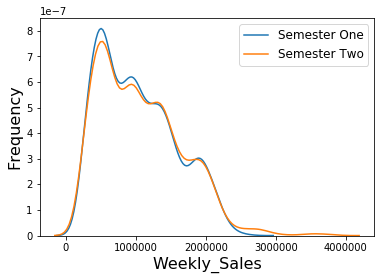

In [470]:
df_11 = df_walmart[df_walmart.Semester == 1]
sns.distplot(df_11['Weekly_Sales'],hist=False, kde= True, bins = 30, label='Semester One')
df_11 = df_walmart[df_walmart.Semester == 2]
sns.distplot(df_11['Weekly_Sales'],hist=False, kde = True, bins = 30, label='Semester Two')
plt.legend(prop = {'size':12})
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

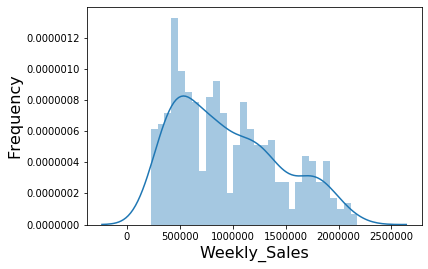

In [471]:
df_11 = df_walmart[df_walmart.Month == 1]
sns.distplot(df_11['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

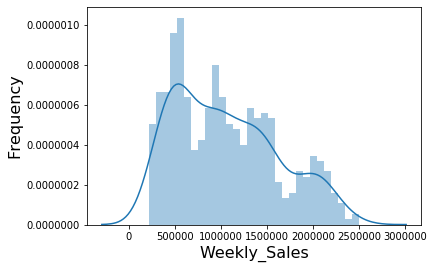

In [472]:
df_12 = df_walmart[df_walmart.Month == 2]
sns.distplot(df_12['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

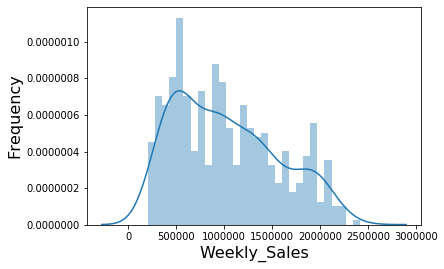

In [473]:
df_13 = df_walmart[df_walmart.Month == 3]
sns.distplot(df_13['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

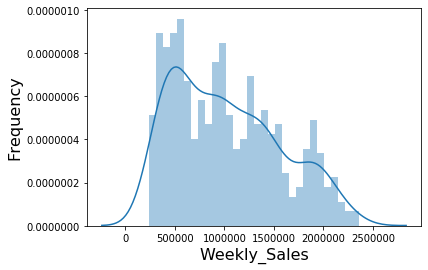

In [474]:
df_14 = df_walmart[df_walmart.Month == 4]
sns.distplot(df_14['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

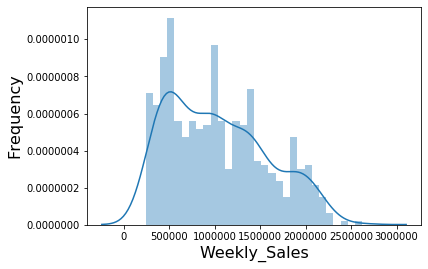

In [475]:
df_15 = df_walmart[df_walmart.Month == 5]
sns.distplot(df_15['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

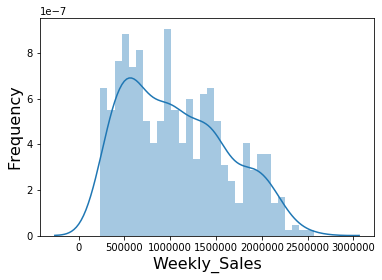

In [476]:
df_16 = df_walmart[df_walmart.Month == 6]
sns.distplot(df_16['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

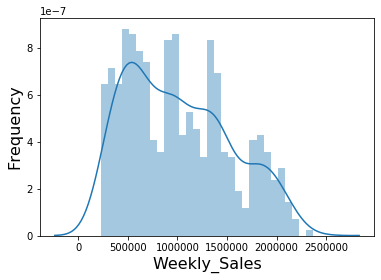

In [477]:
df_17 = df_walmart[df_walmart.Month == 7]
sns.distplot(df_17['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

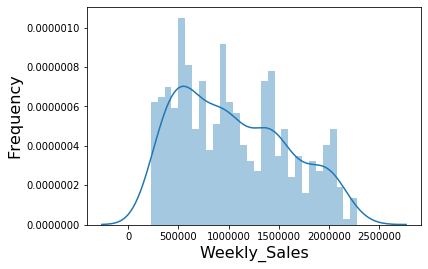

In [478]:
df_18 = df_walmart[df_walmart.Month == 8]
sns.distplot(df_18['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

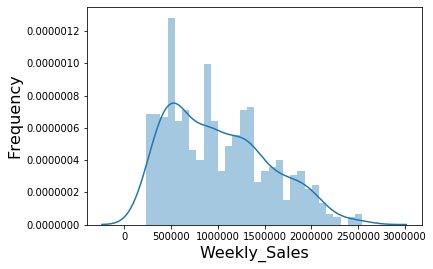

In [479]:
df_19 = df_walmart[df_walmart.Month == 9]
sns.distplot(df_19['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

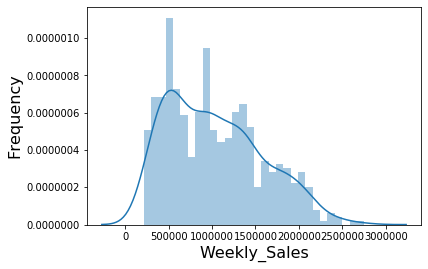

In [480]:
df_110 = df_walmart[df_walmart.Month == 10]
sns.distplot(df_110['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

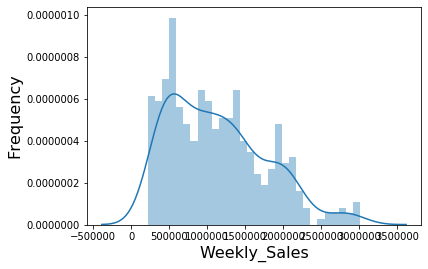

In [481]:
df_111 = df_walmart[df_walmart.Month == 11]
sns.distplot(df_111['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

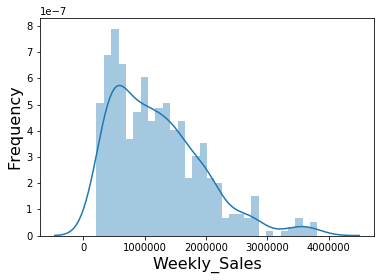

In [482]:
df_112 = df_walmart[df_walmart.Month == 12]
sns.distplot(df_112['Weekly_Sales'], bins=30)
plt.xlabel('Weekly_Sales', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [483]:
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log,Month,Quarter,Year,Semester
Date,,,,,,,,,,,,,
05-02-2010,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,5,2,2010,1
12-02-2010,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,12,4,2010,2
19-02-2010,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966,2,1,2010,1
26-02-2010,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907,2,1,2010,1
05-03-2010,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,5,2,2010,1


# Building train-test set

In [484]:
x = df_walmart.drop(['Weekly_Sales', 'Weekly_Sales_log', 'Date'], axis=1)
y = df_walmart['Weekly_Sales_log']

In [485]:
from sklearn.model_selection import train_test_split

In [486]:
x_train,x_test,y_train,y_test = train_test_split( x, y, test_size=0.20, random_state=0)

# Machine Learning Models

## Linear Regression

In [487]:
from sklearn.linear_model import LinearRegression

In [488]:
linreg = LinearRegression()

In [489]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [490]:
y_predict = linreg.predict(x_test)

In [491]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_Linear = df.head(45)
df_Linear

,Actual,Predicted
Date,,
14-10-2011,14.015168,13.692297
08-06-2012,14.035708,13.493449
28-10-2011,13.134130,13.861339
04-03-2011,13.176041,13.376157
11-11-2011,13.485944,13.702646
24-09-2010,13.713233,13.774837
17-12-2010,13.382652,13.906096
20-07-2012,14.146536,13.386662
25-11-2011,14.026714,13.880326


In [492]:
from sklearn import metrics

In [493]:
metrics.mean_absolute_error(y_test,y_predict)

0.4504371100603925

In [494]:
metrics.mean_squared_error(y_test,y_predict)

0.295019019243118

In [495]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

0.5431565329102818

# Standardizing train and test data :

In [496]:
from sklearn.preprocessing import StandardScaler

In [497]:
sc_x = StandardScaler()

In [498]:
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# KNN Regressor

In [499]:
from sklearn.metrics import mean_absolute_error

In [500]:
from sklearn.neighbors import KNeighborsRegressor

In [501]:
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)

In [502]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=4, n_neighbors=10, p=2,
                    weights='uniform')

In [503]:
y_pred = knn.predict(x_test)

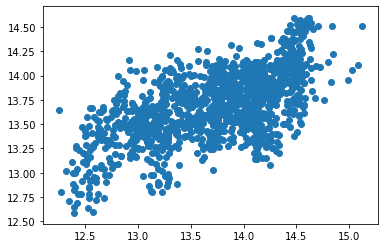

In [504]:
plt.scatter(y_test,y_pred)

In [505]:
mean_absolute_error(y_test,y_pred)

0.37173175193824587

In [506]:
accuracy = knn.score(x_test, y_test)
print(accuracy)

0.3831204038239209


# Random Forest Regressor

In [507]:
from sklearn.ensemble import RandomForestRegressor

In [508]:
rfr = RandomForestRegressor()        

In [509]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [510]:
y_pred=rfr.predict(x_test)

In [511]:
accuracy = rfr.score(x_test, y_test)

In [512]:
print(accuracy)

0.9695161540815048


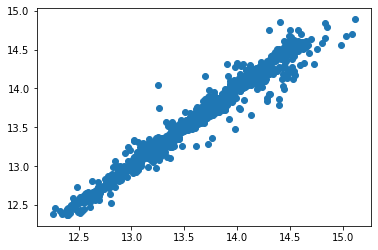

In [513]:
plt.scatter(y_test,y_pred)

# Selecting the model

Best accuracy model we found 

Random Forest Regressor with almost 96% accuracy of the model